# Coleta de dados e primeiras análises

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
#ignorar os avisos do python
warnings.filterwarnings('ignore')

In [22]:
# alterando o tamanho das figuras
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (16,9)

In [23]:
url = "https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip"
df = pd.read_csv(url, compression='zip', sep = ';')

In [24]:
df.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [25]:
df['datahora'] = pd.to_datetime(df['datahora'], format = "%Y-%m-%d")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286178 entries, 0 to 286177
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   nome_munic     286178 non-null  object        
 1   codigo_ibge    286178 non-null  int64         
 2   dia            286178 non-null  int64         
 3   mes            286178 non-null  int64         
 4   datahora       286178 non-null  datetime64[ns]
 5   casos          286178 non-null  int64         
 6   casos_novos    286178 non-null  int64         
 7   casos_pc       286178 non-null  object        
 8   casos_mm7d     286178 non-null  object        
 9   obitos         286178 non-null  int64         
 10  obitos_novos   286178 non-null  int64         
 11  obitos_pc      286178 non-null  object        
 12  obitos_mm7d    286178 non-null  object        
 13  letalidade     286178 non-null  object        
 14  nome_ra        285735 non-null  object        
 15  

<AxesSubplot:xlabel='datahora', ylabel='casos'>

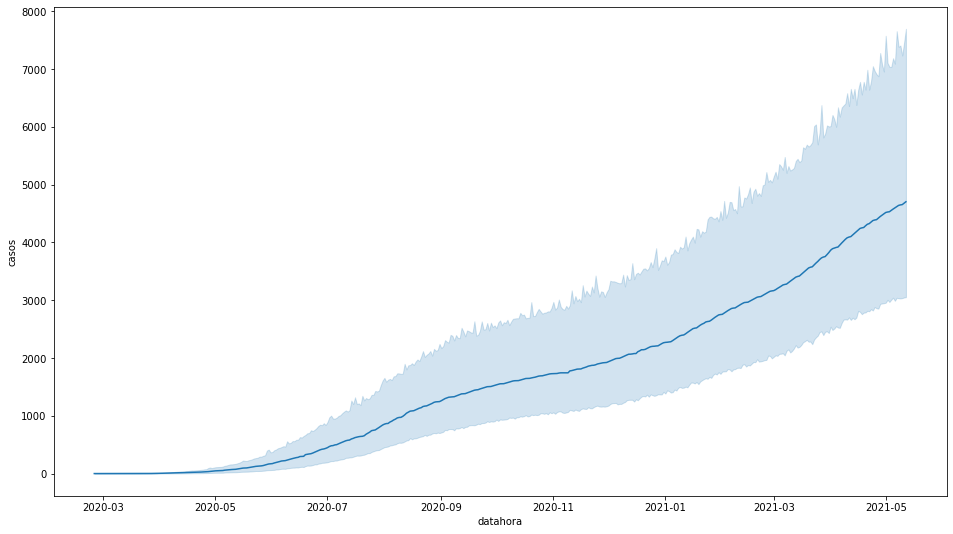

In [27]:
sns.lineplot(x = 'datahora', y = 'casos', data = df)

In [28]:
# Criando os dados somente para a cidade de São Paulo

df_sp = df.query("nome_munic == 'São Paulo'")
df_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9


In [29]:
print("O menor número de casos foi de {} no dia {}\nO maior número de casos foi de {} no dia {}".format(df['casos_novos'].min(), df['datahora'][df['casos_novos']  == df['casos_novos'].min()].min(), df['casos_novos'].max(),df['datahora'][df['casos_novos']  == df['casos_novos'].max()].max())
)

O menor número de casos foi de -419 no dia 2020-03-25 00:00:00
O maior número de casos foi de 8646 no dia 2021-04-01 00:00:00


Podemos observar que o menor número de casos é um valor negativo, logo alguma coisa de errado não está certa

In [30]:
(df['casos_novos'] < 0).sum()

207

No total são 207 que possuem valores negativos no número de casos

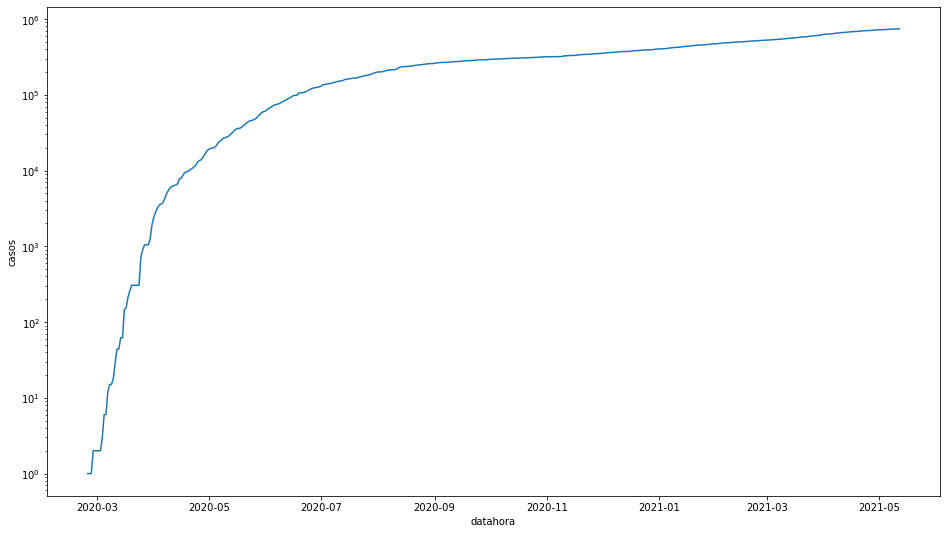

In [31]:
sns.lineplot(x = 'datahora', y = 'casos', data = df_sp)

# Utilizando escala logaritmica no eixo Y
mpl.pyplot.yscale('log')

# Desafio 01: Filtrar a base com alguma outra função

# Desafio 02: Escolher outro município para fazer a análise

<AxesSubplot:xlabel='datahora', ylabel='casos'>

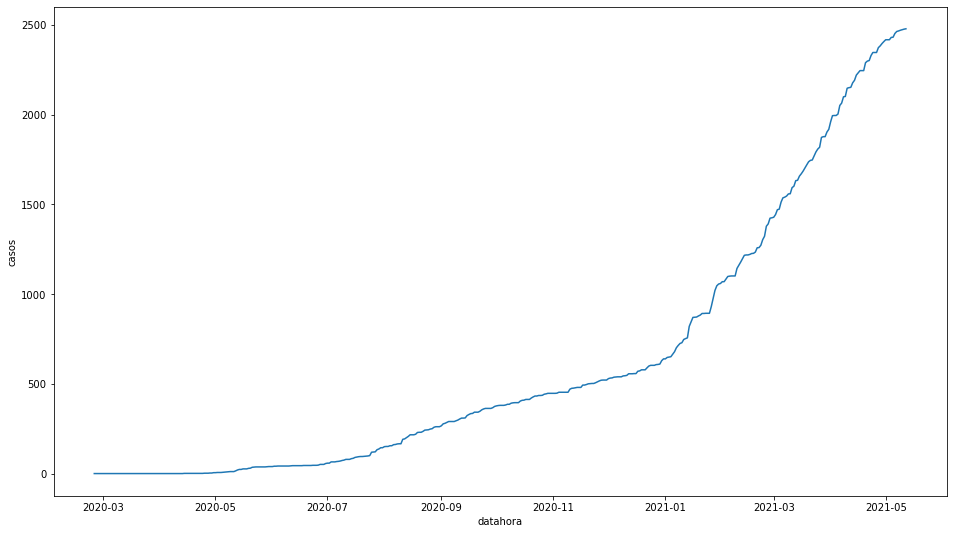

In [32]:
sns.lineplot(x = 'datahora', y = 'casos', data = df[df['nome_munic'] == 'Adamantina'])

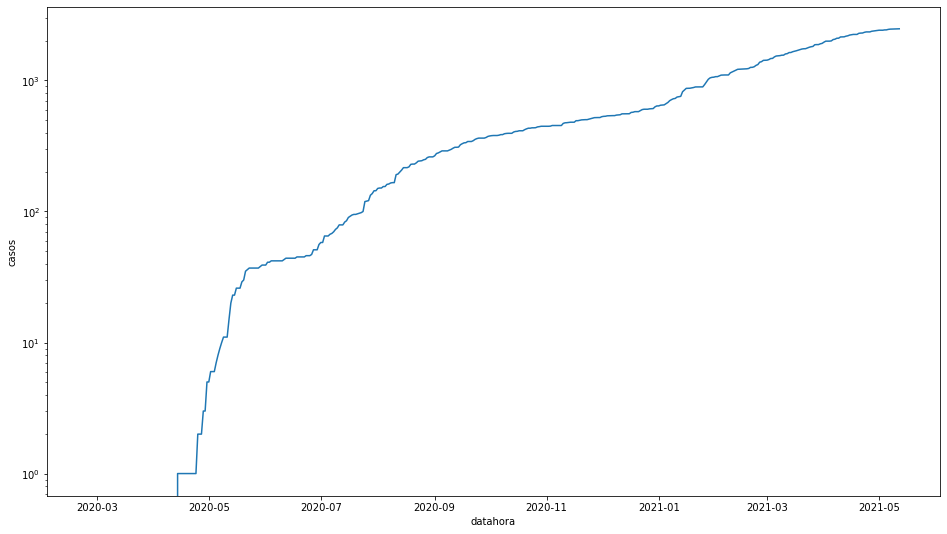

In [33]:
sns.lineplot(x = 'datahora', y = 'casos', data = df[df['nome_munic'] == 'Adamantina'])
# Utilizando escala logaritmica no eixo Y
mpl.pyplot.yscale('log')

# Taxa de Crescimento e média móvel 

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

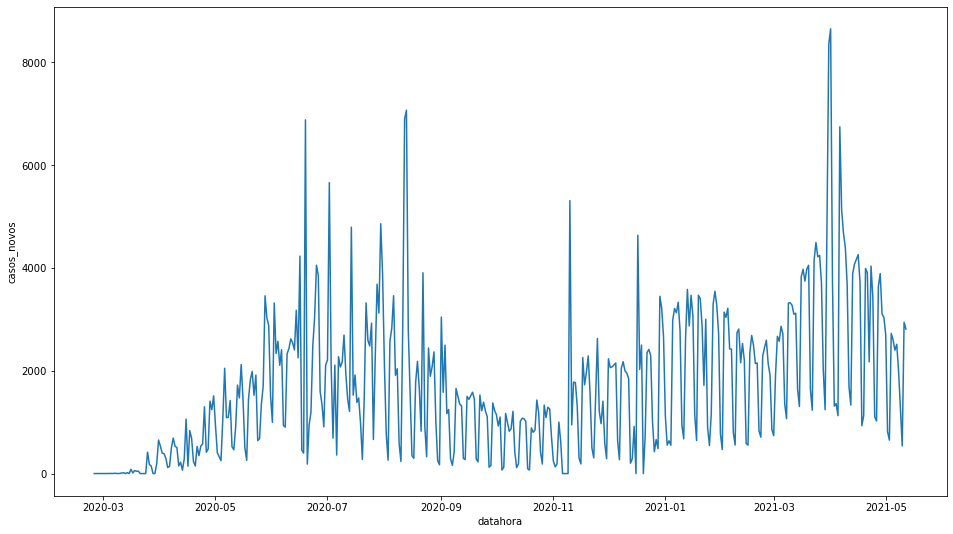

In [34]:
sns.lineplot(x = 'datahora', y='casos_novos', data = df_sp)

In [35]:
df_sp['taxa_casos'] = df_sp['casos_novos'].diff()
df_sp['taxa_obitos'] = df_sp['obitos_novos'].diff()

<AxesSubplot:xlabel='datahora', ylabel='taxa_casos'>

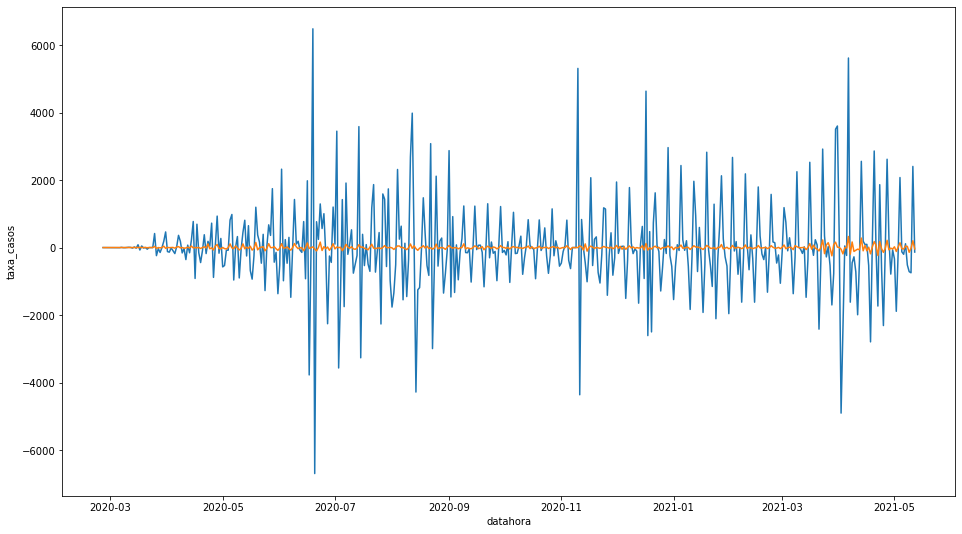

In [36]:
sns.lineplot(x = 'datahora', y = 'taxa_casos', data = df_sp)
sns.lineplot(x = 'datahora', y = 'taxa_obitos', data = df_sp)

<BarContainer object of 443 artists>

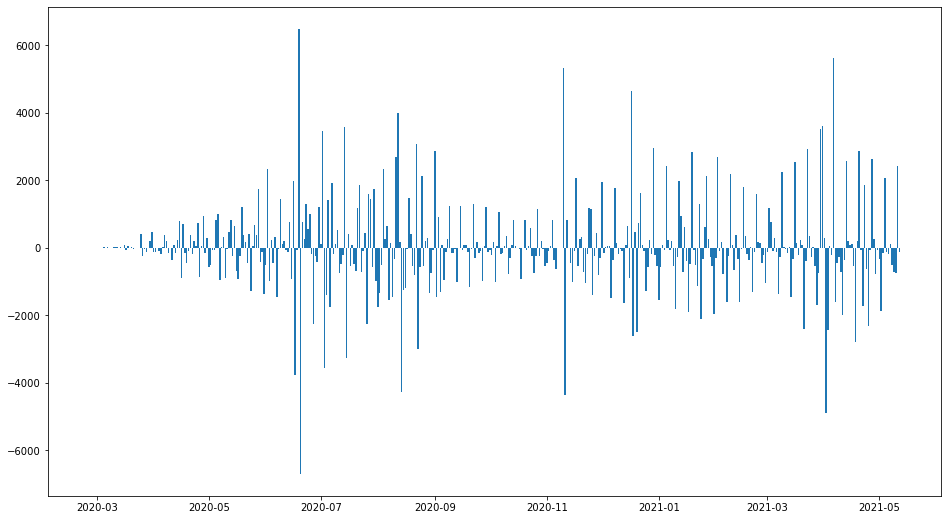

In [44]:
plt.bar(df_sp['datahora'], df_sp['taxa_casos'])

In [49]:
df_sp['ano'] = pd.DatetimeIndex(df_sp['datahora']).year 
df_2021 = df_sp.query("ano == 2021 ")

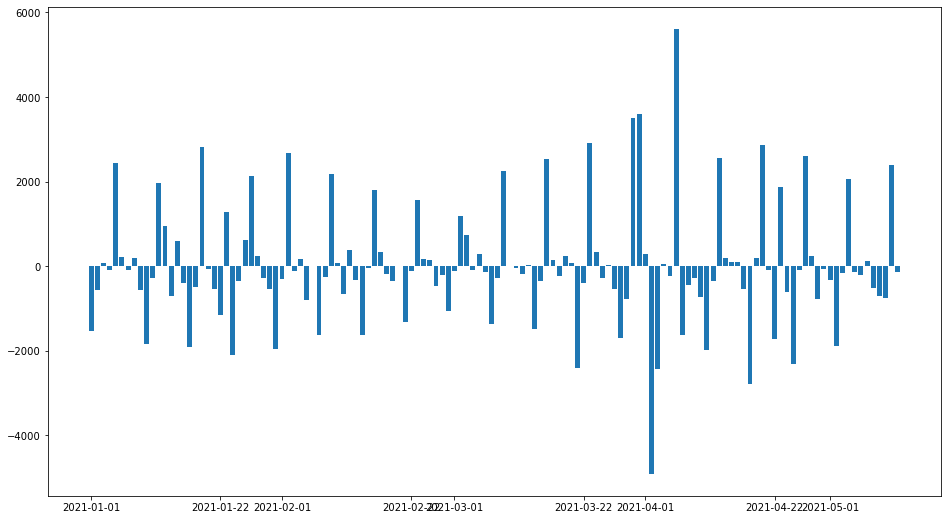

In [76]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize = (16,9))

plt.bar(df_2021['datahora'], df_2021['taxa_casos'])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

#ax.xaxis.set_minor_locator(mdates.DayLocator(interval= 1))

fig.show()

In [85]:
df_sp['mm_casos'] = df_sp['casos_novos'].rolling(window= 7, center = False).mean()
df_sp['mm_obitos'] = df_sp['obitos_novos'].rolling(window= 7, center = False).mean()

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

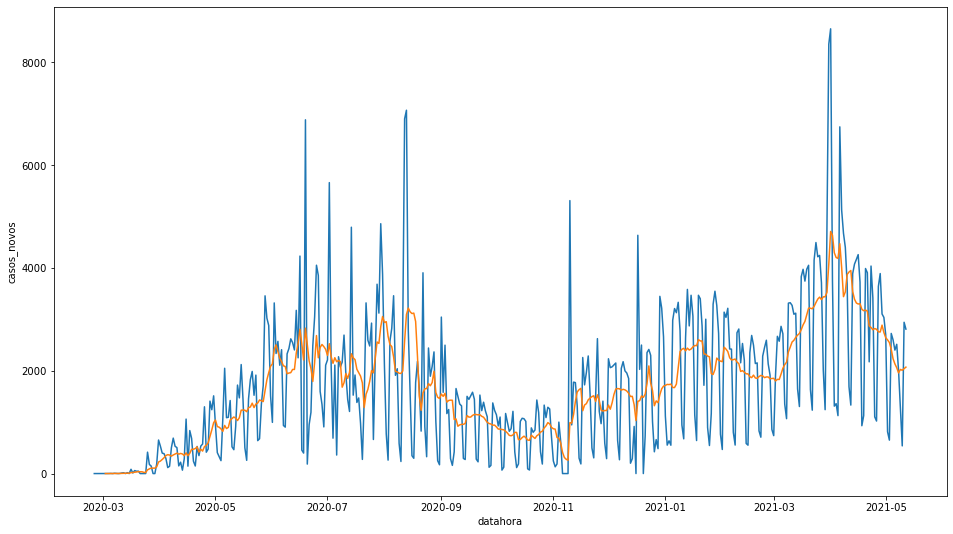

In [82]:
sns.lineplot(x = 'datahora', y = 'casos_novos', data = df_sp)
sns.lineplot(x = 'datahora', y = 'mm_casos', data = df_sp)

# Correlação e funções de autocorrelação

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

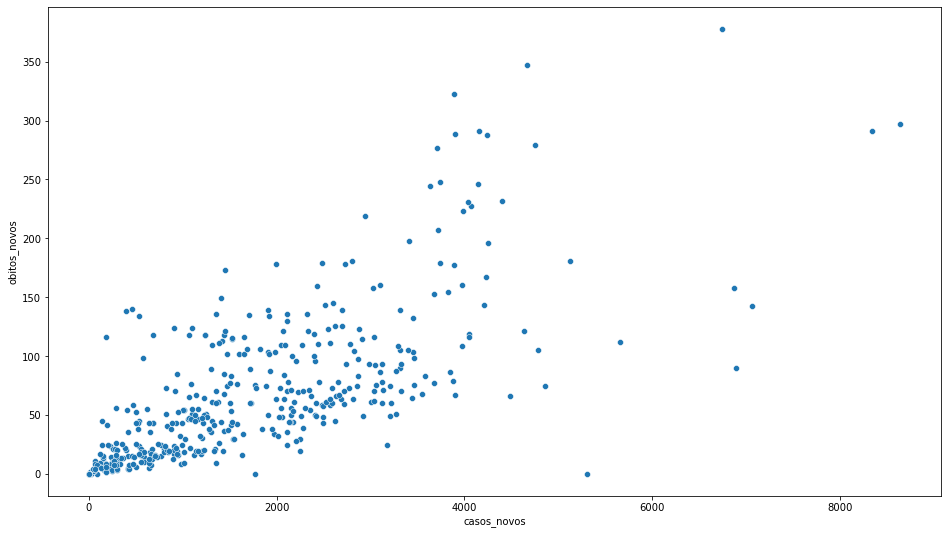

In [91]:
sns.scatterplot(x = 'casos_novos', y = 'obitos_novos', data = df_sp)

In [116]:
df_202101 = df_sp.query("mes ==1 & ano == 2021")
df_202102 = df_sp.query("mes ==2 & ano == 2021")

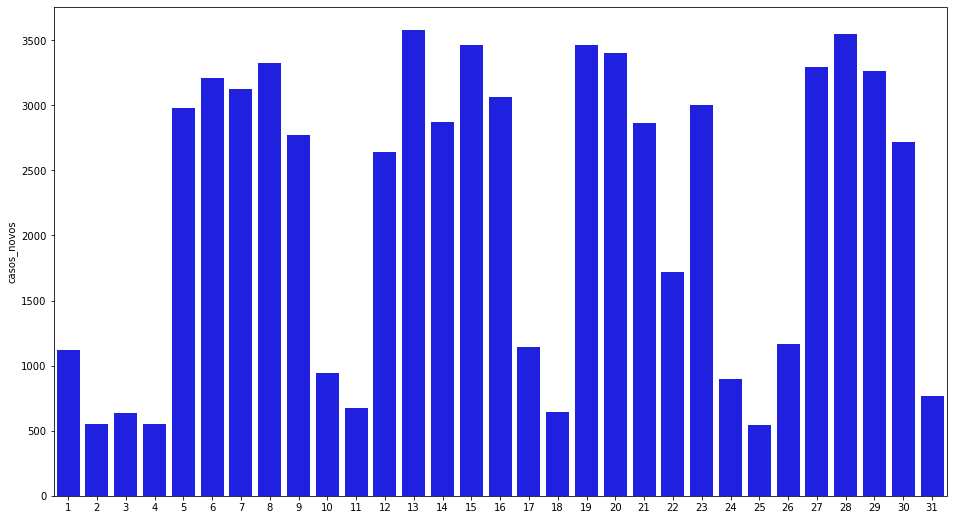

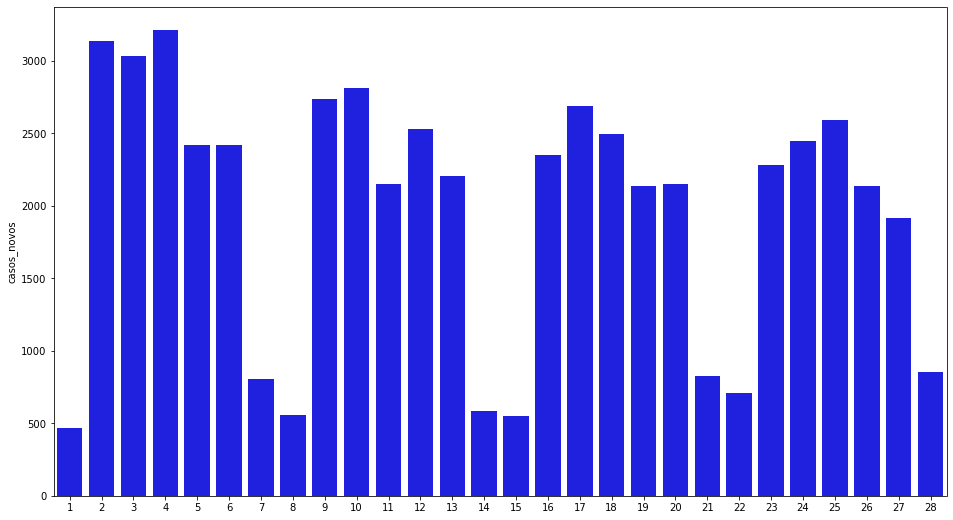

In [134]:
sns.barplot(x = np.linspace(1,31,31,dtype= int),y= 'casos_novos', data = df_202101, color= 'b')
plt.show()
sns.barplot(x = np.linspace(1,28,28,dtype= int),y= 'casos_novos', data = df_202102, color= 'b')
plt.show()

In [135]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

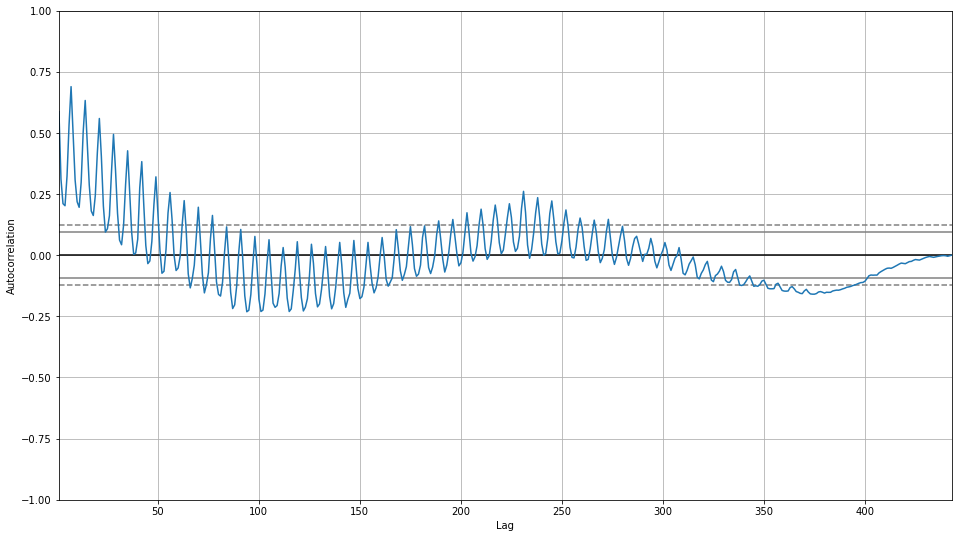

In [136]:
autocorrelation_plot(df_sp['casos_novos'])

In [138]:
np.correlate(df_sp['casos_novos'], df_sp['obitos_novos'])

array([77814340], dtype=int64)

# Desafio 01: Um notebook sem warnings

In [40]:
import warnings
#ignorar os avisos do python
warnings.filterwarnings('ignore')

# Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos.



In [38]:
df_sp[df_sp['taxa_casos'] == df_sp['taxa_casos'].max()]

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_casos,taxa_obitos
74737,São Paulo,3550308,19,6,2020-06-19,105407,6877,"8,880372e+02","2826,4285714",6255,...,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",25,6479.0,20.0


In [41]:
df_sp[df_sp['casos_novos'] == df_sp['casos_novos'].max()]

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_casos,taxa_obitos
259207,São Paulo,3550308,1,4,2021-04-01,628043,8646,"5,291163e+03","4706,2857143",22425,...,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",13,298.0,6.0


In [39]:
df_sp[df_sp['taxa_obitos'] == df_sp['taxa_obitos'].max()]

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_casos,taxa_obitos
262432,São Paulo,3550308,6,4,2021-04-06,642322,6740,"5,411461e+03","4467,5714286",23222,...,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",14,5614.0,328.0


In [42]:
df_sp[df_sp['obitos_novos'] == df_sp['obitos_novos'].max()]

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_casos,taxa_obitos
262432,São Paulo,3550308,6,4,2021-04-06,642322,6740,"5,411461e+03","4467,5714286",23222,...,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",14,5614.0,328.0


# Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.

<AxesSubplot:xlabel='datahora', ylabel='obitos_novos'>

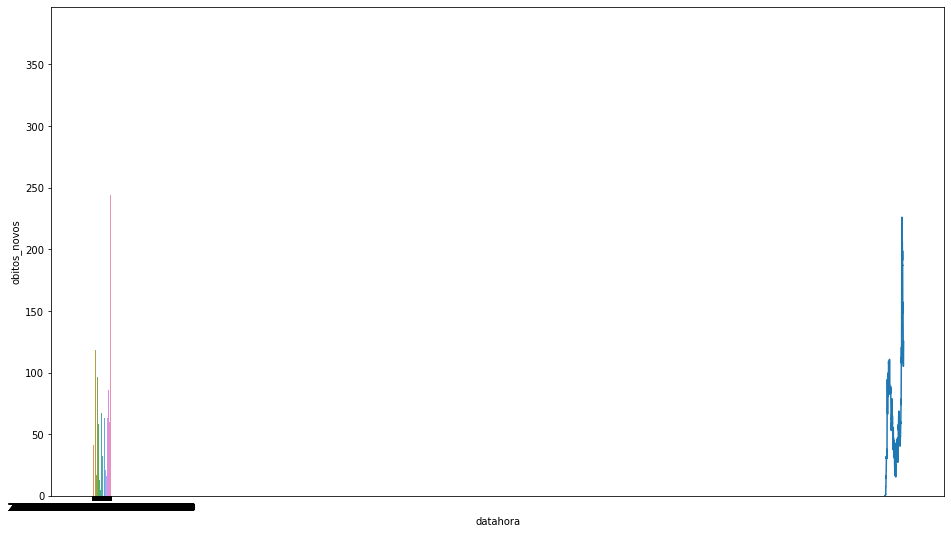

In [86]:
fig, ax = plt.subplots(figsize = (16,9))
sns.barplot(x = 'datahora', y = 'obitos_novos', data = df_sp)
sns.lineplot(x = 'datahora', y = 'mm_obitos', data = df_sp)

# Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

In [112]:
df_sp['obitos_movidos'] = df_sp['obitos_novos'].rolling(window= 14).std()

In [115]:
df_sp[['datahora','obitos_novos', 'obitos_movidos']].tail(20)

,datahora,obitos_novos,obitos_movidos
273397,2021-04-23,231,102.366960
274042,2021-04-24,198,102.433361
274687,2021-04-25,55,105.928677
275332,2021-04-26,29,107.107859
275977,2021-04-27,244,100.330224
276622,2021-04-28,177,98.832192
277267,2021-04-29,160,91.554493
277912,2021-04-30,116,91.097249
278557,2021-05-01,139,89.412398
279202,2021-05-02,23,89.309931


<AxesSubplot:xlabel='casos_novos', ylabel='obitos_movidos'>

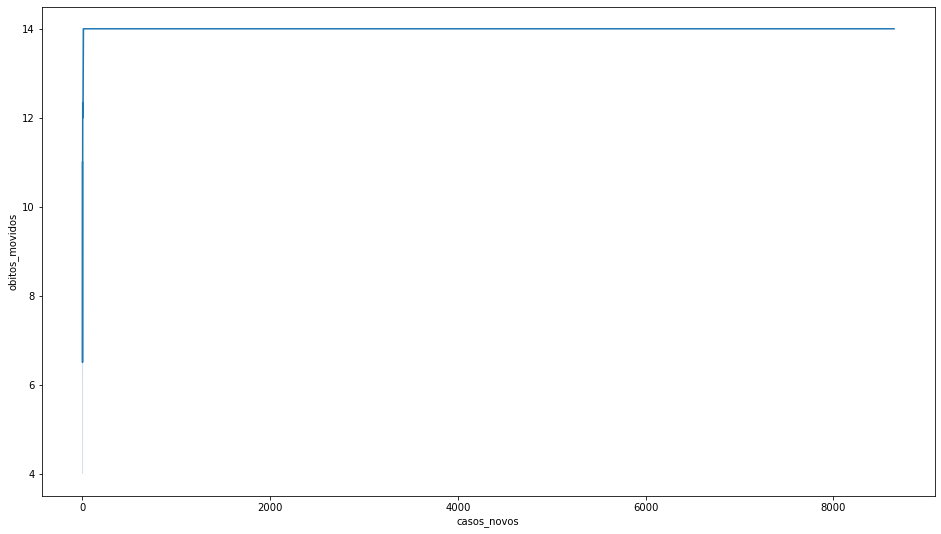

In [104]:
sns.lineplot(x = 'casos_novos', y = 'obitos_movidos', data = df_sp)